# Project 1 Robotic Arm
Group Member: Chuyun Hu, Te Li, Xiaolan Li

The Technical Report about this project from [here.](https://github.com/xiaolancara/Numerical-Methods/blob/main/Report%20about%20Project_01.docx)

### 1. Define function f(Theta)

In [1]:
import math

def f_1(Theta,
        L1 =2,# define fixed constants
        L2=math.sqrt(2),
        L3=math.sqrt(2),
        x1 = 4,
        x2 = 1,
        y2 = 5,
        P1=math.sqrt(5),# define various constants 
        P2=math.sqrt(5),
        P3=math.sqrt(5),
        Alfa=math.pi/2):

    # methods
    A2 = (-x1)+L3*math.cos(Theta)
    B2 = L3*math.sin(Theta)
    A3 = (-x2)+L2*math.cos(Theta)*math.cos(Alfa)-L2*math.sin(Theta)*math.sin(Alfa)
    B3 = (-y2)+L2*math.sin(Theta)*math.cos(Alfa)+L2*math.cos(Theta)*math.sin(Alfa)
    N1 = B3*(P2**2-P1**2-A2**2-B2**2)-B2*(P3**2-P1**2-A3**2-B3**2)
    N2 = (-A3)*(P2**2-P1**2-A2**2-B2**2)+A2*(P3**2-P1**2-A3**2-B3**2)
    D = 2*(A2*B3-A3*B2)
    
    x = N1/D
    y = N2/D
    fTheta = N1**2+N2**2-P1**2*D**2
    return fTheta,x,y

In [2]:
# test function
Theta = math.pi/(-4)

f_1(Theta)[0]

-4.547473508864641e-13

In [3]:
# test function
Theta = math.pi/(4)

f_1(Theta)[0]

1279.999999999999

### 2. Plot function in interval

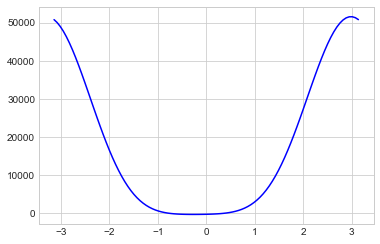

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
ax = plt.axes()
# 100 linearly spaced numbers
x = np.linspace(-math.pi,math.pi,100)

# using vectorize to accept a single element to every element in an array
f2 = np.vectorize(f_1)
y = f2(x)[0]

# plot the function
plt.plot(x,y, 'b')

# show the plot
plt.show()


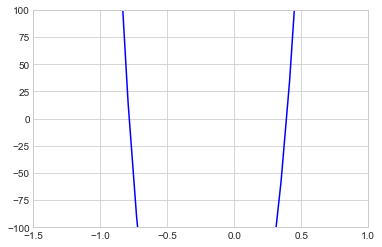

In [5]:
# minimize the axes range to find the roots approximately
plt.xlim([-1.5, 1])
plt.ylim([-100, 100])

# plot the function
plt.plot(x,y, 'b')

# show the plot
plt.show()


The approximate range of roots is -0.7 and 0.4 

### 3. Find roots for function-Bisection Method

In [6]:
def bisection(f, a, b, TOL):
    if np.sign(f(a)[0])*np.sign(f(b)[0]) > 0: # sign is determin if symbol is -1, 0, or 1
        print('f(a)f(b)<0 not satisfied') 
        return # stop execution
    n=1
    fa= f(a)[0]
    fb= f(b)[0]            
    while np.abs(a-b)>TOL:
        c = (a+b)/2
        fc=f(c)[0]   
        n=n+1
        if np.isclose(f(c)[0], 0):
            print('Approximate  root', c, 'has been obtained in', n, 'steps')
            return
        if np.sign(fc)*np.sign(fa)<0:
            b = c
            fb=fc
        else:
            a = c
            fa= fc
    c=(a+b)/2
    print('The final interval [', a, b, '] contains a root')
    print('Approximate  root', c, 'has been obtained in', n, 'steps')
    return c

### 2 roots

In [7]:
# calculate 2 roots, x, y
print('x,y = ',f_1(bisection(f_1,-1,-0.5,0.5e-3))[1:])
print('x,y = ',f_1(bisection(f_1,0,0.5,0.5e-3))[1:])

The final interval [ -0.78564453125 -0.78515625 ] contains a root
Approximate  root -0.785400390625 has been obtained in 11 steps
x,y =  (1.0000001856047074, 2.000001670421697)
The final interval [ 0.39013671875 0.390625 ] contains a root
Approximate  root 0.390380859375 has been obtained in 11 steps
x,y =  (1.692051812927788, 1.4615838353299404)


### 4 roots

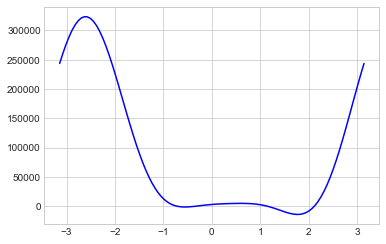

In [8]:
# plot 4 roots
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
# 100 linearly spaced numbers
x = np.linspace(-math.pi,math.pi,100)

# using vectorize to accepts a single element to every element in an array
f2 = np.vectorize(f_1)
y = f2(Theta = x,x1 = 5,x2 = 0, y2 = 6,L1 = 3, L2 = 3*math.sqrt(2), L3 = 3, 
                      Alfa = math.pi/4, P1 = 5, P2 = 5, P3 = 3)[0]

# plot the function
plt.plot(x,y, 'b')

# show the plot
plt.show()

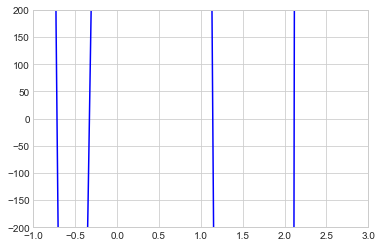

In [9]:
# minimize the axes range to find the roots approximately
plt.xlim([-1, 3])
plt.ylim([-200, 200])

# plot the function
plt.plot(x,y, 'b')

# show the plot
plt.show()


In [10]:
#
from functools import partial
f_2 = partial(f_1, x1 = 5,x2 = 0, y2 = 6,L1 = 3, L2 = 3*math.sqrt(2), L3 = 3, 
                      Alfa = math.pi/4, P1 = 5, P2 = 5, P3 = 3)

In [11]:
# calculate 4 roots, x, y
print('x,y = ', f_2(bisection(f_2,-1,-0.5,0.5e-3))[1:])
print('x,y = ', f_2(bisection(f_2,-0.5,0,0.5e-3))[1:])
print('x,y = ', f_2(bisection(f_2,1,1.5,0.5e-3))[1:])
print('x,y = ', f_2(bisection(f_2,2,2.5,0.5e-3))[1:])

The final interval [ -0.72119140625 -0.720703125 ] contains a root
Approximate  root -0.720947265625 has been obtained in 11 steps
x,y =  (-1.3783754053590007, 4.806336388941391)
The final interval [ -0.3310546875 -0.33056640625 ] contains a root
Approximate  root -0.330810546875 has been obtained in 11 steps
x,y =  (-0.9141519833851972, 4.916017410961223)
The final interval [ 1.1435546875 1.14404296875 ] contains a root
Approximate  root 1.143798828125 has been obtained in 11 steps
x,y =  (4.481509479451289, 2.2162314309079965)
The final interval [ 2.11572265625 2.1162109375 ] contains a root
Approximate  root 2.115966796875 has been obtained in 11 steps
x,y =  (4.571856803703797, 2.0245571032416927)


### 6 roots

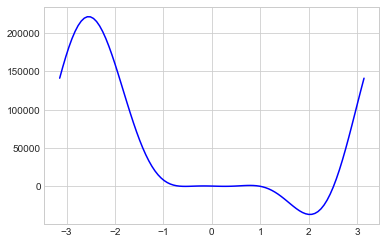

In [12]:
# plot 6 roots
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
# 100 linearly spaced numbers
x = np.linspace(-math.pi,math.pi,100)

# using vectorize to accepts a single element to every element in an array
f3 = np.vectorize(f_1)
y = f3(Theta = x,x1 = 5,x2 = 0, y2 = 6,L1 = 3, L2 = 3*math.sqrt(2), L3 = 3, 
                      Alfa = math.pi/4, P1 = 5, P2 = 7, P3 = 3)[0]

# plot the function
plt.plot(x,y, 'b')

# show the plot
plt.show()

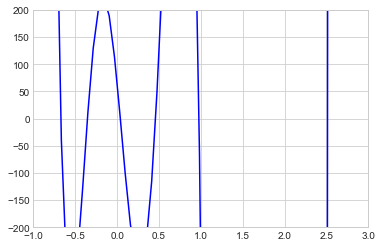

In [13]:
# minimize the axes range to find the roots approximately
plt.xlim([-1, 3])
plt.ylim([-200, 200])

# plot the function
plt.plot(x,y, 'b')

# show the plot
plt.show()


In [14]:
# change the P2 to 7
f_3 = partial(f_2, P2 = 7)

# calculate 6 roots, x, y
print('x,y = ', f_3(bisection(f_3,-1,-0.5,0.5e-3))[1:])
print('x,y = ', f_3(bisection(f_3,-0.5,0,0.5e-3))[1:])
print('x,y = ', f_3(bisection(f_3,0,0.25,0.5e-3))[1:])
print('x,y = ', f_3(bisection(f_3,0.25,0.5,0.5e-3))[1:])
print('x,y = ', f_3(bisection(f_3,0.5,1,0.5e-3))[1:])
print('x,y = ', f_3(bisection(f_3,2,3,0.5e-3))[1:])

The final interval [ -0.67333984375 -0.6728515625 ] contains a root
Approximate  root -0.673095703125 has been obtained in 11 steps
x,y =  (-4.314869073528968, 2.5262058288769764)
The final interval [ -0.35498046875 -0.3544921875 ] contains a root
Approximate  root -0.354736328125 has been obtained in 11 steps
x,y =  (-4.80490159300974, 1.3830880996338781)
The final interval [ 0.03759765625 0.0380859375 ] contains a root
Approximate  root 0.037841796875 has been obtained in 10 steps
x,y =  (-4.9488947628147635, 0.7122818254223181)
The final interval [ 0.45849609375 0.458984375 ] contains a root
Approximate  root 0.458740234375 has been obtained in 10 steps
x,y =  (-0.8219947230250111, 4.930699161003842)
The final interval [ 0.9775390625 0.97802734375 ] contains a root
Approximate  root 0.977783203125 has been obtained in 11 steps
x,y =  (2.3036255488058464, 4.437219607285857)
The final interval [ 2.513671875 2.51416015625 ] contains a root
Approximate  root 2.513916015625 has been obta